In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

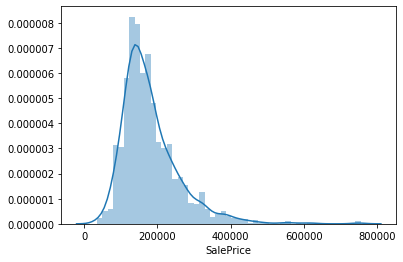

In [5]:
sns.distplot(df_train['SalePrice'])

## Measure of Skewness and Kurtosis
Skewness and Kurtosis are the measures used to test the normality of a given data set. 

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution is symmetric if it looks the same to the left and right of the centre point. On the other hand, a distribution is skewed if one of its tails is longer than the other. A distribution is positively skewed if it has a longer tail in the positive direction (on the right side), and negatively skewed if it has a longer tail in the negative direction (on the left side).

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data set with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [6]:
df_train['SalePrice'].skew()

1.8828757597682129

In [7]:
df_train['SalePrice'].kurt()

6.536281860064529

###  Skewness Rules of Thumb

If skewness is not close to zero, then the data is not normally distributed. Skewness of 0 means that the data is perfectly symmetrical. 
* If the skewness is less than -1 or higher than +1, the distribution is highly skewed. 
* If the skewness is between -1 and -0.5 or 0.5 and 1, the distribution is moderately skewed.
* Is the skewness is between -0.5 and +0.5, the distribution is approximately symetric. 

### Kurtosis Rules of Thumb
* If the Kurtosis is close to 0, then the the distribution is assumbed to be normal: __mesokurtic__ distribution.
* If the Kurtosis is less than 0, then the distributin has light tails: __platykurtic__ distribution.
* If the Kurtosis is greater than 0, then the distribution has heavy tails: __leptokurtic__ distribution.

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)

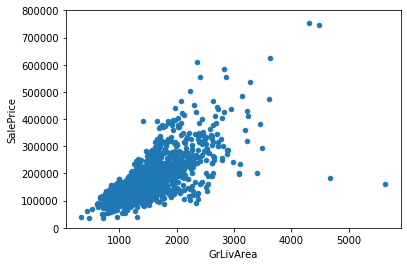

In [9]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

In [10]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(-0.5, 9.5, 0, 800000)

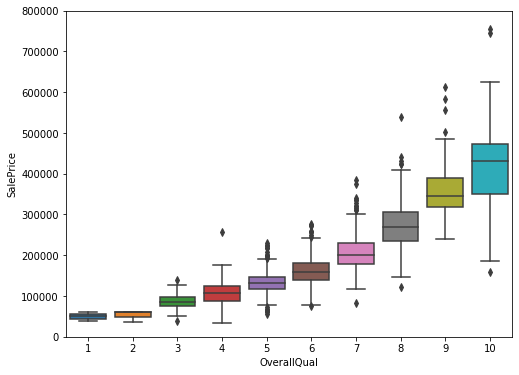

In [11]:
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

### Heatmap Correlation Matrix

1. Finding the top features in terms of correlation to the target feature (sail price):
   * Getting the correlation matrix for the whole dataset:
     ```python
corr_mat = df.corr()
```
   * Capturing the k most correlated features to the target feature (sail price):
    
    ```python
    cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
    ```
    
2. Creating a numpy correlation coefficient matrix for the selected k features:
    ```python
    ccm = np.corrcoef(df[cols].values.T)
```
    * The reason for transposing df[cols] values: Numpy corrcoef function consider rows as the base for the variables it caculates the coefficients for. 
    
    
3. Plotting the heatmap/correlation:

```python
seaborn.heatmap(ccm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=col.values)
```

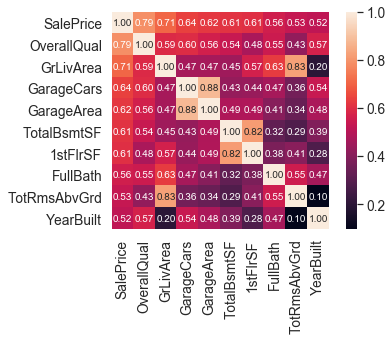

In [12]:
corrmat = df_train.corr()
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm =  np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [13]:
corrmat.nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

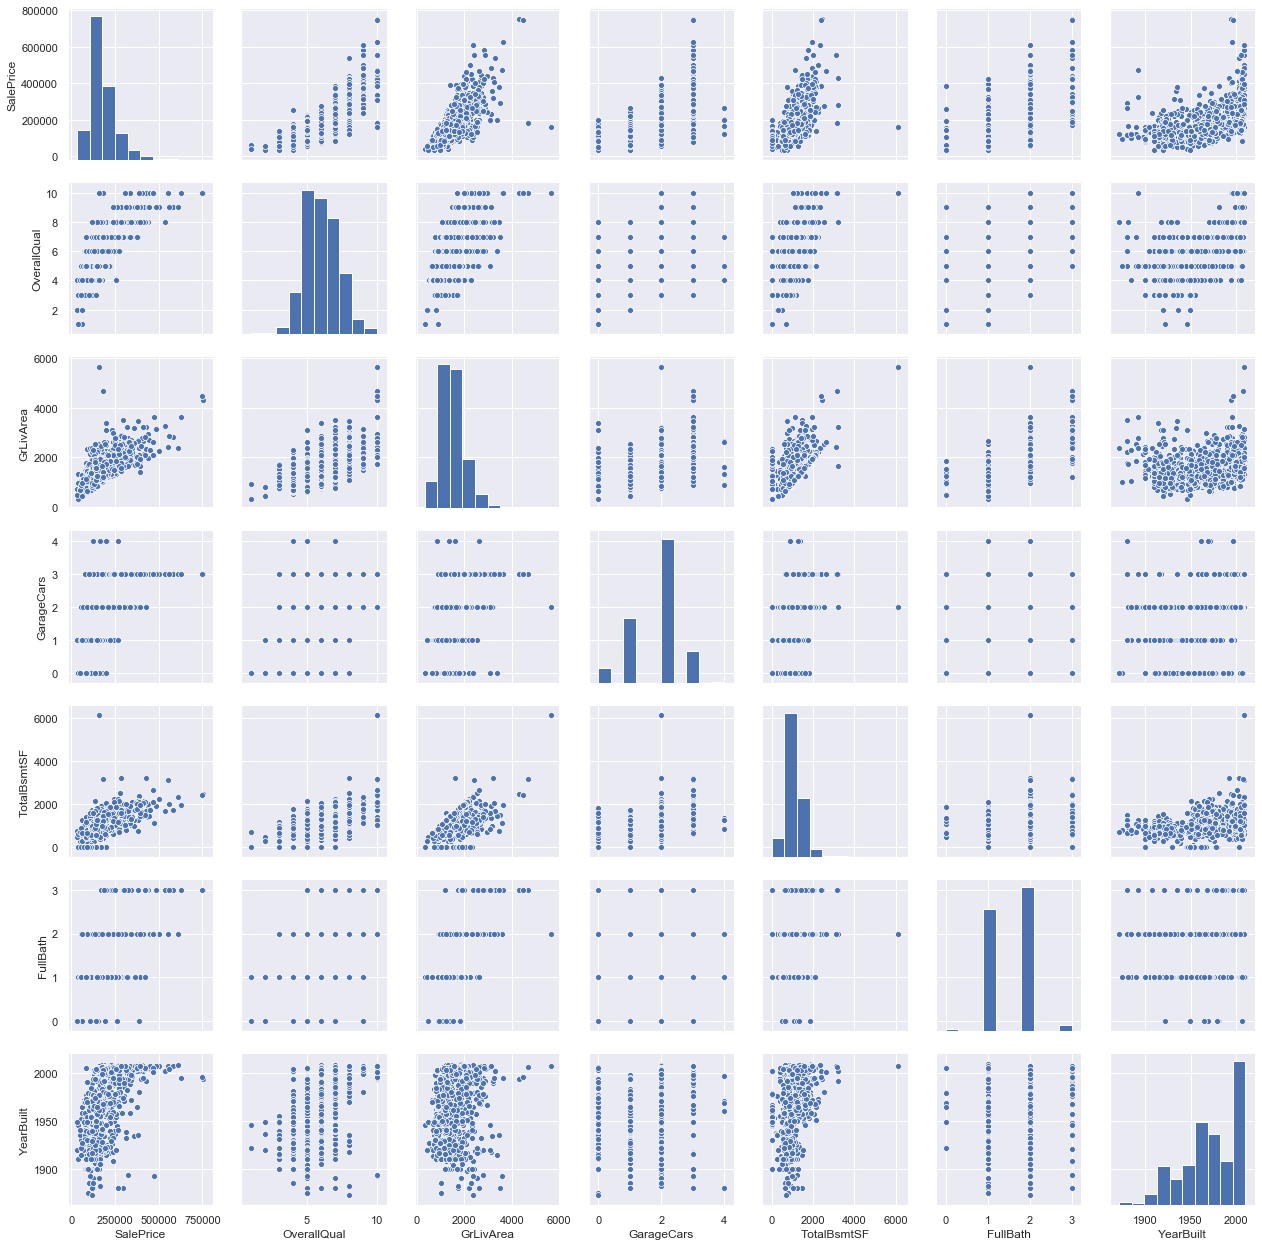

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height=2.5)
plt.show()